<a href="https://colab.research.google.com/github/RajeshworM/IMPDS_Datafrom_Portal/blob/main/map_amrita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1890501892.py:92: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  haryana["centroid"] = haryana.geometry.centroid
/tmp/ipython-input-1890501892.py:111: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  Patch(facecolor="white", edgecolor="black", hatch=".  .  .",
/tmp/ipython-input-1890501892.py:113: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  Patch(facecolor="white", edgecolor="black", hatch="/  /  /",


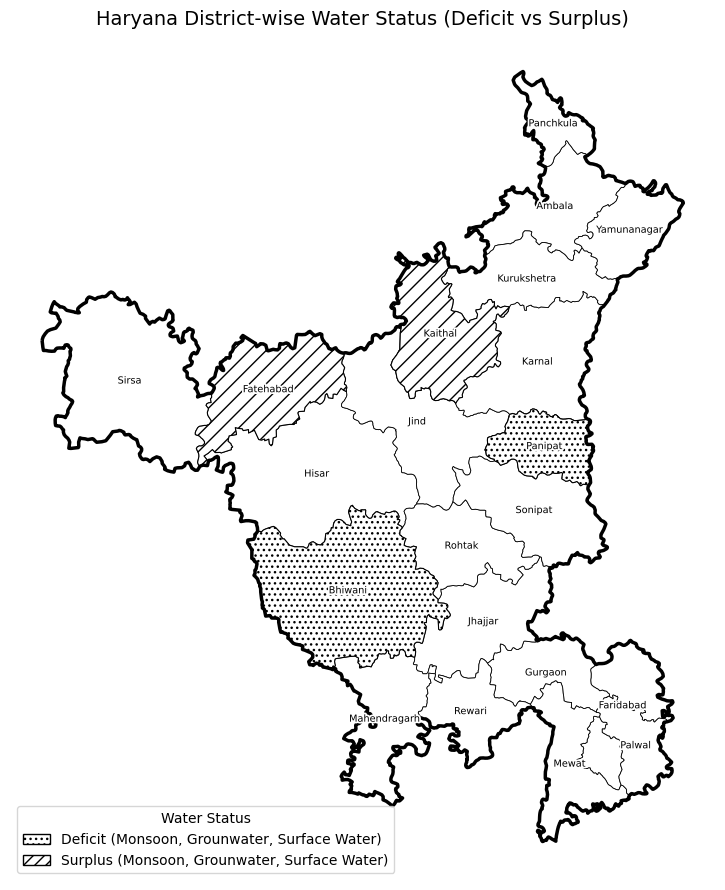

In [1]:
# ==========================================================
# Haryana Water Status Map
# DEFICIT vs SURPLUS (Two-pattern logic)
# ==========================================================

# 1. Install required libraries
!pip install geopandas matplotlib pandas shapely fiona pyproj

# 2. Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# 3. Download India district shapefile (GADM)
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
!wget -q $url
!unzip -q gadm41_IND_shp.zip

# 4. Load Haryana districts
gdf = gpd.read_file("gadm41_IND_2.shp")
haryana = gdf[gdf["NAME_1"] == "Haryana"].copy()
haryana = haryana.rename(columns={"NAME_2": "District"})

# 5. Create simplified deficit–surplus table
data = {
    "District": [
        "Ambala","Bhiwani","Charkhi Dadri","Faridabad","Fatehabad","Gurugram",
        "Hisar","Jhajjar","Jind","Kaithal","Karnal","Kurukshetra",
        "Mahendragarh","Nuh","Palwal","Panipat","Panchkula","Rewari",
        "Rohtak","Sirsa","Sonipat","Yamunanagar"
    ],
    # 1 = any deficit present
    "Deficit": [
        0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
    ],
    # 1 = any surplus present
    "Surplus": [
        0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
    ]
}

df = pd.DataFrame(data)

# 6. Join with shapefile
haryana = haryana.merge(df, on="District", how="left")

# ==========================================================
# 7. PLOT MAP
# ==========================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# Base map
haryana.plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    linewidth=0.6
)

# DEFICIT pattern
haryana[haryana["Deficit"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch=". . .",
    linewidth=0.8
)

# SURPLUS pattern
haryana[haryana["Surplus"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="/  /",
    linewidth=0.8
)

# State boundary
haryana.dissolve().boundary.plot(
    ax=ax,
    linewidth=2.5,
    edgecolor="black"
)

# ==========================================================
# 8. DISTRICT LABELS
# ==========================================================

haryana["centroid"] = haryana.geometry.centroid

for _, row in haryana.iterrows():
    ax.text(
        row.centroid.x,
        row.centroid.y,
        row["District"],
        fontsize=7,
        color="black",
        ha="center",
        va="center",
        path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]
    )

# ==========================================================
# 9. LEGEND
# ==========================================================

legend_items = [
    Patch(facecolor="white", edgecolor="black", hatch=".  .  .",
          label="Deficit (Monsoon, Grounwater, Surface Water)"),
    Patch(facecolor="white", edgecolor="black", hatch="/  /  /",
          label="Surplus (Monsoon, Grounwater, Surface Water)")
]

ax.legend(
    handles=legend_items,
    title="Water Status",
    loc="lower left",
    frameon=True
)

# ==========================================================
# 10. FINAL TOUCHES
# ==========================================================

ax.set_title(
    "Haryana District-wise Water Status (Deficit vs Surplus)",
    fontsize=14
)

ax.axis("off")

plt.savefig(
    "Haryana_Water_Status_Deficit_Surplus.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
